<a href="https://colab.research.google.com/github/LucasMirandaVS/Exerc-cios_Python/blob/main/Analisando_o_Desemprego_no_Brasil_com_dados_do_PNADC_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importando os dados de desemprego do csv baixado no portal do PNADC

In [2]:
desemprego = pd.read_csv('STP-20220317102940796.csv', encoding = 'latin1', sep = ';')

In [3]:
desemprego.head()

,Data,24369 - Taxa de desocupação - PNADC - %,24371 - Empregados no setor privado e público - PNADC - Unidades (mil),24372 - Empregados no setor público - PNADC - Unidades (mil),24373 - Empregado por conta própria - PNADC - Unidades (mil),24375 - Empregados no setor privado - Com carteira - PNADC - Unidades (mil),24376 - Empregados no setor privado - Sem Carteira - PNADC - Unidades (mil),24377 - Empregados no setor privado - Total - PNADC - Unidades (mil)
0,03/2012,"8,0",62.105,10.767,20.174,34.262,11.122,45.384
1,04/2012,"7,8",62.586,10.884,20.205,34.574,11.180,45.754
2,05/2012,"7,7",62.927,10.925,20.165,34.759,11.244,46.003
3,06/2012,"7,6",63.299,11.031,19.930,35.004,11.265,46.269
4,07/2012,"7,5",63.523,11.119,19.843,35.120,11.293,46.413


In [4]:
desemprego.dtypes

Data                                                                           object
24369 - Taxa de desocupação - PNADC - %                                        object
24371 - Empregados no setor privado e público - PNADC - Unidades (mil)         object
24372 - Empregados no setor público - PNADC - Unidades (mil)                   object
24373 - Empregado por conta própria - PNADC - Unidades (mil)                   object
24375 - Empregados no setor privado - Com carteira - PNADC - Unidades (mil)    object
24376 - Empregados no setor privado - Sem Carteira - PNADC - Unidades (mil)    object
24377 - Empregados no setor privado - Total - PNADC - Unidades (mil)           object
dtype: object

In [5]:
# Esses nomes de coluna estão muito feios, vou dar uma diminuida
desemprego.columns.tolist()

['Data',
 '24369 - Taxa de desocupação - PNADC - %',
 '24371 - Empregados no setor privado e público - PNADC - Unidades (mil)',
 '24372 - Empregados no setor público - PNADC - Unidades (mil)',
 '24373 - Empregado por conta própria - PNADC - Unidades (mil)',
 '24375 - Empregados no setor privado - Com carteira - PNADC - Unidades (mil)',
 '24376 - Empregados no setor privado - Sem Carteira - PNADC - Unidades (mil)',
 '24377 - Empregados no setor privado - Total - PNADC - Unidades (mil)']

In [7]:
columns = desemprego.columns.tolist()
desemprego.rename(
columns = {
    columns[1]: 'Taxa de desocupação',
    columns[2]: 'Empregados no setor privado e público',
    columns[3]: 'Empregados no setor público',
    columns[4]: 'Empregado por conta própria',
    columns[5]: 'Empregados no setor privado - com carteira',
    columns[6]: 'Empregados no setor privado - sem Carteira',
    columns[7]: 'Empregados no setor privado - total'
},
inplace = True
)


In [8]:
desemprego.tail()

,Data,Taxa de desocupação,Empregados no setor privado e público,Empregados no setor público,Empregado por conta própria,Empregados no setor privado - com carteira,Empregados no setor privado - sem Carteira,Empregados no setor privado - total
114,09/2021,"12,6",61.724,11.168,25.461,33.508,11.691,45.199
115,10/2021,"12,1",62.497,11.152,25.638,33.876,11.956,45.832
116,11/2021,"11,6",63.287,11.275,25.841,34.224,12.179,46.403
117,12/2021,"11,1",64.010,11.375,25.944,34.495,12.443,46.938
118,Fonte,IBGE,IBGE,IBGE,IBGE,IBGE,IBGE,IBGE


In [9]:
desemprego.query('Data == "Fonte"').index

Int64Index([118], dtype='int64')

In [10]:
# Dropando a última linha com nome errado
desemprego.drop(desemprego.query('Data == "Fonte"').index, inplace = True)

In [11]:
desemprego

,Data,Taxa de desocupação,Empregados no setor privado e público,Empregados no setor público,Empregado por conta própria,Empregados no setor privado - com carteira,Empregados no setor privado - sem Carteira,Empregados no setor privado - total
0,03/2012,"8,0",62.105,10.767,20.174,34.262,11.122,45.384
1,04/2012,"7,8",62.586,10.884,20.205,34.574,11.180,45.754
2,05/2012,"7,7",62.927,10.925,20.165,34.759,11.244,46.003
3,06/2012,"7,6",63.299,11.031,19.930,35.004,11.265,46.269
4,07/2012,"7,5",63.523,11.119,19.843,35.120,11.293,46.413
...,...,...,...,...,...,...,...,...
113,08/2021,"13,1",60.760,11.230,25.253,32.894,11.342,44.236
114,09/2021,"12,6",61.724,11.168,25.461,33.508,11.691,45.199
115,10/2021,"12,1",62.497,11.152,25.638,33.876,11.956,45.832
116,11/2021,"11,6",63.287,11.275,25.841,34.224,12.179,46.403


In [12]:
desemprego.dtypes

Data                                          object
Taxa de desocupação                           object
Empregados no setor privado e público         object
Empregados no setor público                   object
Empregado por conta própria                   object
Empregados no setor privado - com carteira    object
Empregados no setor privado - sem Carteira    object
Empregados no setor privado - total           object
dtype: object

In [13]:
# Para analisar como série temporal
desemprego.Data = pd.to_datetime(desemprego.Data, format = '%m/%Y')

In [14]:
desemprego.dtypes

Data                                          datetime64[ns]
Taxa de desocupação                                   object
Empregados no setor privado e público                 object
Empregados no setor público                           object
Empregado por conta própria                           object
Empregados no setor privado - com carteira            object
Empregados no setor privado - sem Carteira            object
Empregados no setor privado - total                   object
dtype: object

In [15]:
desemprego.head()

,Data,Taxa de desocupação,Empregados no setor privado e público,Empregados no setor público,Empregado por conta própria,Empregados no setor privado - com carteira,Empregados no setor privado - sem Carteira,Empregados no setor privado - total
0,2012-03-01,"8,0",62.105,10.767,20.174,34.262,11.122,45.384
1,2012-04-01,"7,8",62.586,10.884,20.205,34.574,11.180,45.754
2,2012-05-01,"7,7",62.927,10.925,20.165,34.759,11.244,46.003
3,2012-06-01,"7,6",63.299,11.031,19.930,35.004,11.265,46.269
4,2012-07-01,"7,5",63.523,11.119,19.843,35.120,11.293,46.413


In [16]:
for coluna in desemprego.select_dtypes(object):
    print(coluna)

Taxa de desocupação
Empregados no setor privado e público
Empregados no setor público
Empregado por conta própria
Empregados no setor privado - com carteira
Empregados no setor privado - sem Carteira
Empregados no setor privado - total


In [17]:
desemprego['Taxa de desocupação'].str.replace(',', '.')

0       8.0 
1       7.8 
2       7.7 
3       7.6 
4       7.5 
       ...  
113    13.1 
114    12.6 
115    12.1 
116    11.6 
117    11.1 
Name: Taxa de desocupação, Length: 118, dtype: object

In [18]:
for column in desemprego.select_dtypes(object):
    if column == 'Taxa de desocupação':
        desemprego[column] = desemprego[column].str.replace(',', '.').astype(float)
    else:
        desemprego[column] = desemprego[column].astype(float)

In [19]:
desemprego.dtypes

Data                                          datetime64[ns]
Taxa de desocupação                                  float64
Empregados no setor privado e público                float64
Empregados no setor público                          float64
Empregado por conta própria                          float64
Empregados no setor privado - com carteira           float64
Empregados no setor privado - sem Carteira           float64
Empregados no setor privado - total                  float64
dtype: object

In [20]:
desemprego.set_index('Data', inplace = True)

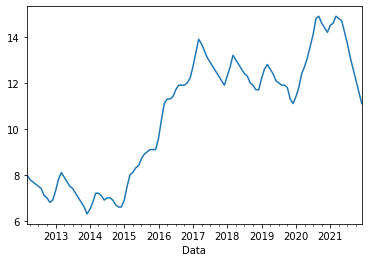

In [21]:
desemprego['Taxa de desocupação'].plot();

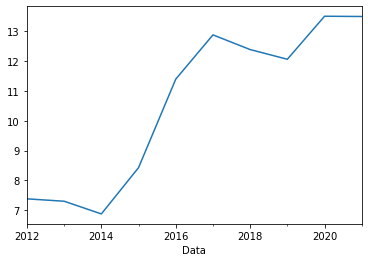

In [22]:
desemprego['Taxa de desocupação'].resample('Y').agg(np.mean).plot();

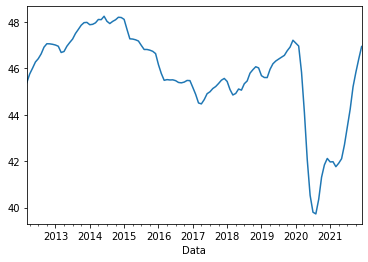

In [23]:
desemprego['Empregados no setor privado - total'].plot()

In [24]:
# Agora observando os componentes de sazonalidade 
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
ts_decompose = seasonal_decompose(desemprego['Empregados no setor privado - total'])

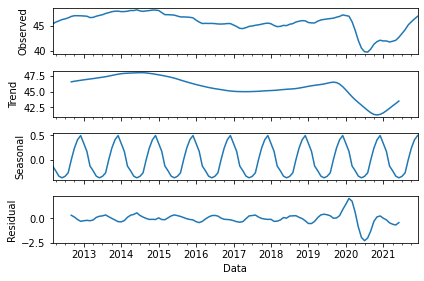

In [26]:
ts_decompose.plot();

In [27]:
desemprego['Empregados no setor privado - total'].pct_change()

Data
2012-03-01         NaN
2012-04-01    0.008153
2012-05-01    0.005442
2012-06-01    0.005782
2012-07-01    0.003112
                ...   
2021-08-01    0.017621
2021-09-01    0.021770
2021-10-01    0.014005
2021-11-01    0.012459
2021-12-01    0.011529
Name: Empregados no setor privado - total, Length: 118, dtype: float64

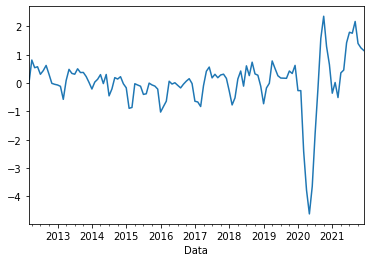

In [28]:
(desemprego['Empregados no setor privado - total'].pct_change().fillna(0)*100).plot();